# Assignment 3: Part 1: k-means sklearn model

Fitting the k-means clustering algorithm on the breast cancer dataset.

# Importing necessary libraries

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd

# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing KMeans
from sklearn.cluster import KMeans

# Importing silhouette score for model evaluation
from sklearn.metrics import silhouette_score

# Importing the dataset

In [3]:
# Importing the breast cancer dataset
from sklearn.datasets import load_breast_cancer

# Creating an object
bcancer = load_breast_cancer()

In [9]:
# Keys of the dataset
bcancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# Description of the dataset
print(bcancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
# Creating a dataframe for the features data
data = pd.DataFrame(bcancer['data'],columns = bcancer['feature_names'])

# Checking the head of the data
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Checking for null values
data.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

There are no missing values in the dataset.

The dataset is ready to be used.

# Understanding the data

In [6]:
# Information regarding the features of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
# Descriptive statistics of the features in the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


All the features relate to the oncology domain. Each feature relates to the dimension of a tumor and helps predict whether the tumor is malignant or benign.

Since we want to see if the datapoints cluster together or not, I am skipping the Exploratory data analysis.

# K-means clustering algorithn
Fitting the k-means clustering algorithm on the data

In [30]:
# Initiating an object of KMeans clustering with 2 clusters
kmeans = KMeans(init="random",n_clusters=2,max_iter=300,random_state=101)

In [31]:
kmeans.fit(data)

KMeans(init='random', n_clusters=2, random_state=101)

In [32]:
# Model summary
# The lowest sum of squared error value
print("Lowest SSE: ",kmeans.inertia_)
print("\n")

# Cluster centroids after the clustering
print("Cluster centroids: \n",kmeans.cluster_centers_)
print("\n")

# Labels
print("Cluster labels: \n")
print(kmeans.labels_)
print("\n")

# Number of iterations required to converge
print("No. of iterations: ",kmeans.n_iter_)

Lowest SSE:  77943099.8782988


Cluster centroids: 
 [[1.25562991e+01 1.85703653e+01 8.11234703e+01 4.96061872e+02
  9.48844977e-02 9.10998174e-02 6.24377642e-02 3.34325434e-02
  1.78057991e-01 6.34540183e-02 3.04190868e-01 1.21515320e+00
  2.15288059e+00 2.37852922e+01 7.17326256e-03 2.34746895e-02
  2.87455128e-02 1.06363242e-02 2.06135799e-02 3.74750297e-03
  1.40439018e+01 2.47095434e+01 9.19375114e+01 6.19647945e+02
  1.29959110e-01 2.23311758e-01 2.19214947e-01 9.13298425e-02
  2.83553653e-01 8.32819406e-02]
 [1.93799237e+01 2.16945802e+01 1.28231298e+02 1.18592977e+03
  1.01294580e-01 1.48612977e-01 1.76939466e-01 1.00698779e-01
  1.91539695e-01 6.06029008e-02 7.42803817e-01 1.22253817e+00
  5.25058015e+00 9.56781679e+01 6.59868702e-03 3.21766947e-02
  4.24197710e-02 1.56739847e-02 2.03039695e-02 3.95338931e-03
  2.37094656e+01 2.89126718e+01 1.58496183e+02 1.75302290e+03
  1.40424733e-01 3.57757710e-01 4.49306107e-01 1.92431069e-01
  3.11881679e-01 8.61654962e-02]]


Cluster la

In [33]:
# Model Evaluation using Silhouette Coefficient
kmeans_silhouette = silhouette_score(data, kmeans.labels_)
print("Silhouette score for k=2: ",kmeans_silhouette)

Silhouette score for k=2:  0.6972646156059464


# Choosing the value of k

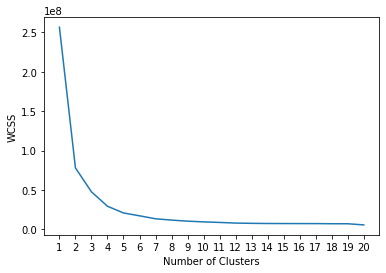

In [8]:
# List to store the sum of squared errors
sse = []
 
 # Finding the SSE score for different k values in the range 1 to 20
for k in range(1, 21):
  kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300,random_state=101)
  kmeans.fit(data)
  sse.append(kmeans.inertia_)

# Plotting the graph for SSE
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Using the elbow method, the value of k should be the one with maximum kink. Here it should be 2.
Logically also, k must be 2, since there are only two classes in this dataset: tumor is malignant or tumor is benign.